###Part 1: Fundamentals of Python

###1.1. Python Syntax and Basic Operations
In Python, variables are used to store data. Python supports several data types, including integers, floats, strings, and booleans.

In [1]:
# Example of different data types in Python

# Integer
a = 10
print("Integer:", a)

# Float
b = 3.14
print("Float:", b)

# String
c = "Hello, Python!"
print("String:", c)

# Boolean
d = True
print("Boolean:", d)

Integer: 10
Float: 3.14
String: Hello, Python!
Boolean: True


###1.2 Basic Operations
Python allows for various operations, such as arithmetic operations with numbers and concatenation with strings.

In [2]:
# Arithmetic operations
x = 5
y = 2

print("Addition:", x + y)       # Output: 7
print("Subtraction:", x - y)    # Output: 3
print("Multiplication:", x * y) # Output: 10
print("Division:", x / y)       # Output: 2.5

# String concatenation
first_name = "John"
last_name = "Doe"
full_name = first_name + " " + last_name
print("Full Name:", full_name)  # Output: John Doe

Addition: 7
Subtraction: 3
Multiplication: 10
Division: 2.5
Full Name: John Doe


###1.3 Control Structures

####1.3.1 Conditionals

Python uses if, elif, and else statements to perform different actions based on conditions.

In [3]:
# Example of conditionals

age = 18

if age < 18:
    print("You are a minor.")
elif age == 18:
    print("You are exactly 18!")
else:
    print("You are an adult.")

You are exactly 18!


####1.3.2 Loops

Loops allow you to repeat a block of code multiple times.

In [4]:
# For loop
for i in range(5):
    print("This is iteration number:", i)

# While loop
count = 0
while count < 5:
    print("Count is:", count)
    count += 1 #equivalent to incrementing value by 1

This is iteration number: 0
This is iteration number: 1
This is iteration number: 2
This is iteration number: 3
This is iteration number: 4
Count is: 0
Count is: 1
Count is: 2
Count is: 3
Count is: 4


###1.4 Functions

Functions are reusable blocks of code that perform a specific task.

In [5]:
# Defining a function
def greet(name):
    return "Hello, " + name + "!"

# Calling a function
message = greet("Alice")
print(message)  # Output: Hello, Alice!

Hello, Alice!


###Part 2: Python for Scientific Computing

###2.1 Introduction to NumPy and Matplotlib

####2.1.1 NumPy Basics

NumPy is a fundamental package for numerical computing in Python. It provides support for arrays, matrices, and many mathematical functions.

In [6]:
import numpy as np

# Creating a NumPy array
array = np.array([1, 2, 3, 4, 5])
print("NumPy Array:", array)

# Basic operations with NumPy arrays
print("Sum of array:", np.sum(array))
print("Mean of array:", np.mean(array))

NumPy Array: [1 2 3 4 5]
Sum of array: 15
Mean of array: 3.0


####2.1.2 Matplotlib Basics

Matplotlib is a plotting library for Python. It provides tools for creating static, animated, and interactive plots.

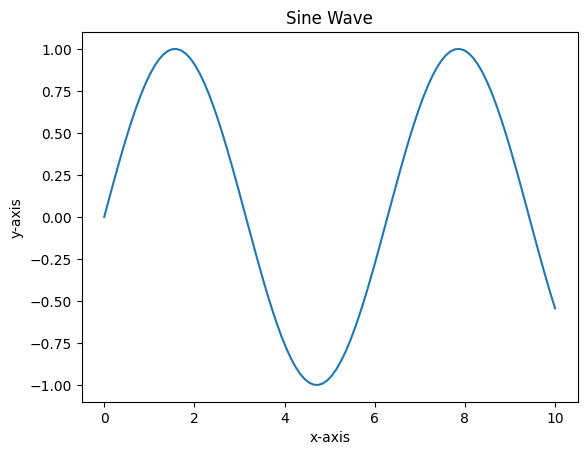

In [7]:
import matplotlib.pyplot as plt

# Simple line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Sine Wave')
plt.show()

###2.2 Importing and Using Modules

Modules in Python are files containing Python code. You can import a module using the import statement and use its functions and classes.

In [8]:
# Importing the math module
import math

# Using a function from the math module
result = math.sqrt(16)
print("Square root of 16 is:", result)  # Output: 4.0

Square root of 16 is: 4.0


###Part 3: Introduction to Neuronal Modeling

###3.1 Classes and objects

In [9]:
# Basic example of a class
class Dog:
    def __init__(self, name):
        self.name = name

    def bark(self):
        return self.name + " says woof!"

# Creating an object
my_dog = Dog("Buddy")
print(my_dog.bark())  # Output: Buddy says woof!

Buddy says woof!


###3.2 Setting up the neuron class

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron():

    # The __init__ method is a special method that is automatically called when a new instance of the class is created.
    def __init__(self):     # Intialise neuron variables
        self.C  = 0.281     # The self keyword refers to the instance of the class itself, allowing each instance to have its own capacitance (C).
        self.gL = 0.030     # leak conductance (units of microsiemens, μS) represents the ease with which ions can flow through the membrane leak channels.
        self.vR = -60.6     # membrane potential. -60.6 millivolts (mV), typical voltage across the neuron's membrane when it is not actively firing.
        self.vT = -50.4     # spike threshold. This is membrane potential at which the neuron will generate a spike or action potential.


    # This method is responsible for generating an external input current that will be injected into the neuron.
    def create_injection_current(self): #current injection function
        max_current = 1     # unit nanoamperes, nA
        self.currentInj = np.append(np.zeros(10),np.arange(0,max_current,0.01)) #10 zeros appended with 0 to 1(non-inclusive) with step of 0.01
        self.T = len(self.currentInj) #total time of simulation


    def leaky_integrate_and_fire(self): #leaky-integrate-and-fire function
        self.timeseries = np.linspace(0,self.T-1,self.T) #timeseries ranging from 0 to T-1. 'T' are the total points.
        self.V=np.ones(self.T)*self.vR #membrane potential array (V) with all values set to the resting potential (vR).
        ii=0 #counter
        while ii<self.T-2:
            #calculate the change in membrane potential (dV) using the leaky integrate-and-fire equation
            dV=(-self.gL*(self.V[ii]-self.vR)+self.currentInj[ii])/self.C
            #-self.gL*(self.V[ii]-self.vR) represents leak current (difference between current voltage and resting potential times the leak conductance)
            #+self.currentInj[ii] adds the current injected at time step ii
            #/self.C divides membrane capacitance to get the change in voltage
            self.V[ii+1]=self.V[ii]+dV # update membrane potential for the next time step (ii + 1) by adding the change in voltage (dV) to the current potential (V[ii]).
            if self.V[ii+1]>self.vT: #checks if the updated membrane potential exceeds the spike threshold (vT).
                self.V[ii+1]=20 #If the threshold is exceeded, this line sets the membrane potential to 20 mV, representing a spike (action potential).
                self.V[ii+2]=self.vR #The next time step (ii + 2) is set back to the resting potential (vR), simulating the neuron's refractory period after a spike.
                ii+=1
            ii+=1

    def plot_neuron(self): #plot neuron's membrane potential and current injection over time
        fig=plt.figure()
        fig.set_figwidth(10)
        fig.set_figheight(8)
        ax=fig.add_subplot(211) #(211 means 2 rows, 1 column, 1st plot).
        ax.plot(self.timeseries,self.currentInj,color='gold')
        ax.set_title('Current Injection',style='italic')
        ax.set_ylabel('Current (nA)', style='italic')

        ax2=fig.add_subplot(212) #(212 means 2 rows, 1 column, 2nd plot).
        ax2.plot(self.timeseries,self.V,color='black')
        ax2.set_title('Integrate and Fire Membrane Potiental Response', style='italic')
        ax2.set_xlabel('Time (ms)',style='italic')
        ax2.set_ylabel('Voltage (mV)', style='italic')
        plt.tight_layout()
        plt.rcParams.update({'font.size': 20})
        plt.show()

####3.2.1 Using the Neuron Class

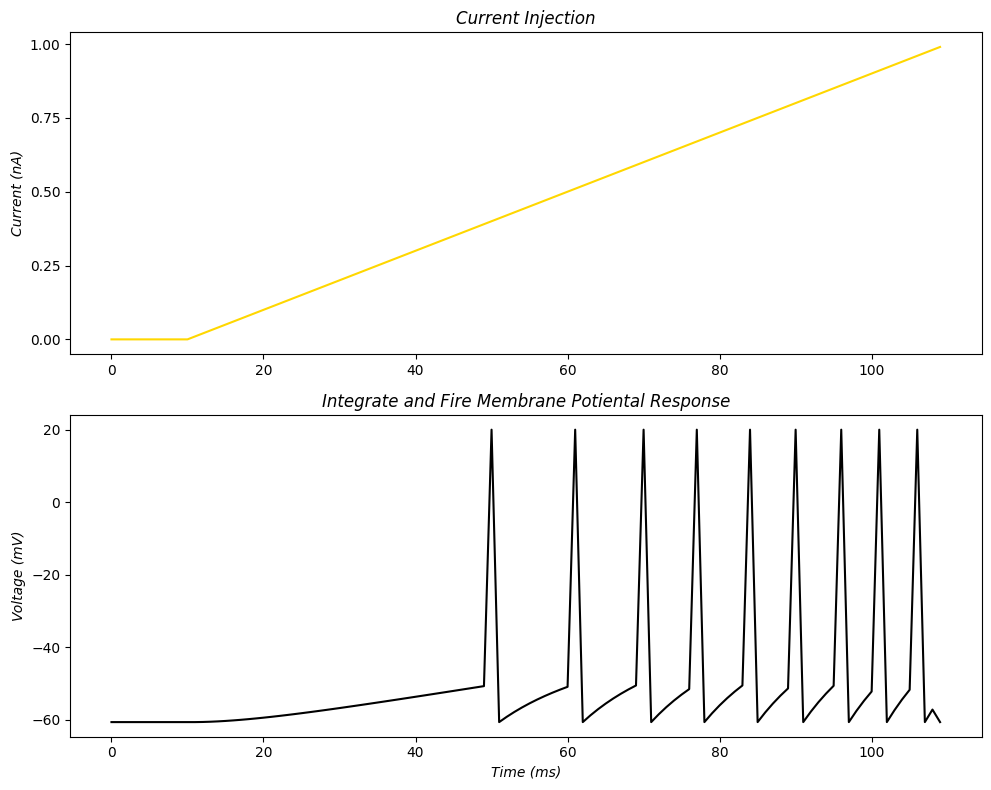

In [11]:
# Create an instance of the Neuron class
neuron_one = Neuron()

# Key methods of the Neuron class
neuron_one.create_injection_current()  # Initializes the injection current
neuron_one.leaky_integrate_and_fire()  # Simulates the neuron using the leaky integrate-and-fire model
neuron_one.plot_neuron()  # Plots the neuron's response

Task:
- Find the parameters that control the neuron model in class Neuron (section 3.2), and modify them.
- Run 3.2.1 again and see the changes.